# **Diabetes-Prediction**

Diabetes, often referred to as diabetes mellitus, is a group of metabolic disorders characterized by elevated blood sugar levels (hyperglycemia) over an extended period. This chronic condition occurs when the body's ability to produce or utilize insulin, a hormone that regulates blood sugar, is impaired. There are several types of diabetes, but the most common ones are Type 1 diabetes, Type 2 diabetes, and gestational diabetes.

1) #### Type 1 Diabetes:
    Type 1 diabetes, also known as juvenile diabetes or insulin-dependent diabetes, typically develops in children and young adults but can occur at any age.
    It results from an autoimmune reaction in which the body's immune system mistakenly attacks and destroys the insulin-producing beta cells in the pancreas.
    
2) #### Type 2 Diabetes:
    Type 2 diabetes is the most common form of diabetes, accounting for the majority of cases worldwide.
    It often develops in adults, although it is increasingly being diagnosed in children and adolescents, primarily due to lifestyle factors such as poor diet and lack of physical activity.
    
3) #### Gestational Diabetes:
    Gestational diabetes occurs during pregnancy when the body cannot produce enough insulin to meet the increased demands, leading to elevated blood sugar levels.
    It usually resolves after childbirth, but women who experience gestational diabetes have a higher risk of developing Type 2 diabetes later in life.

# Importing Libararies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Reading Dataset

In [2]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

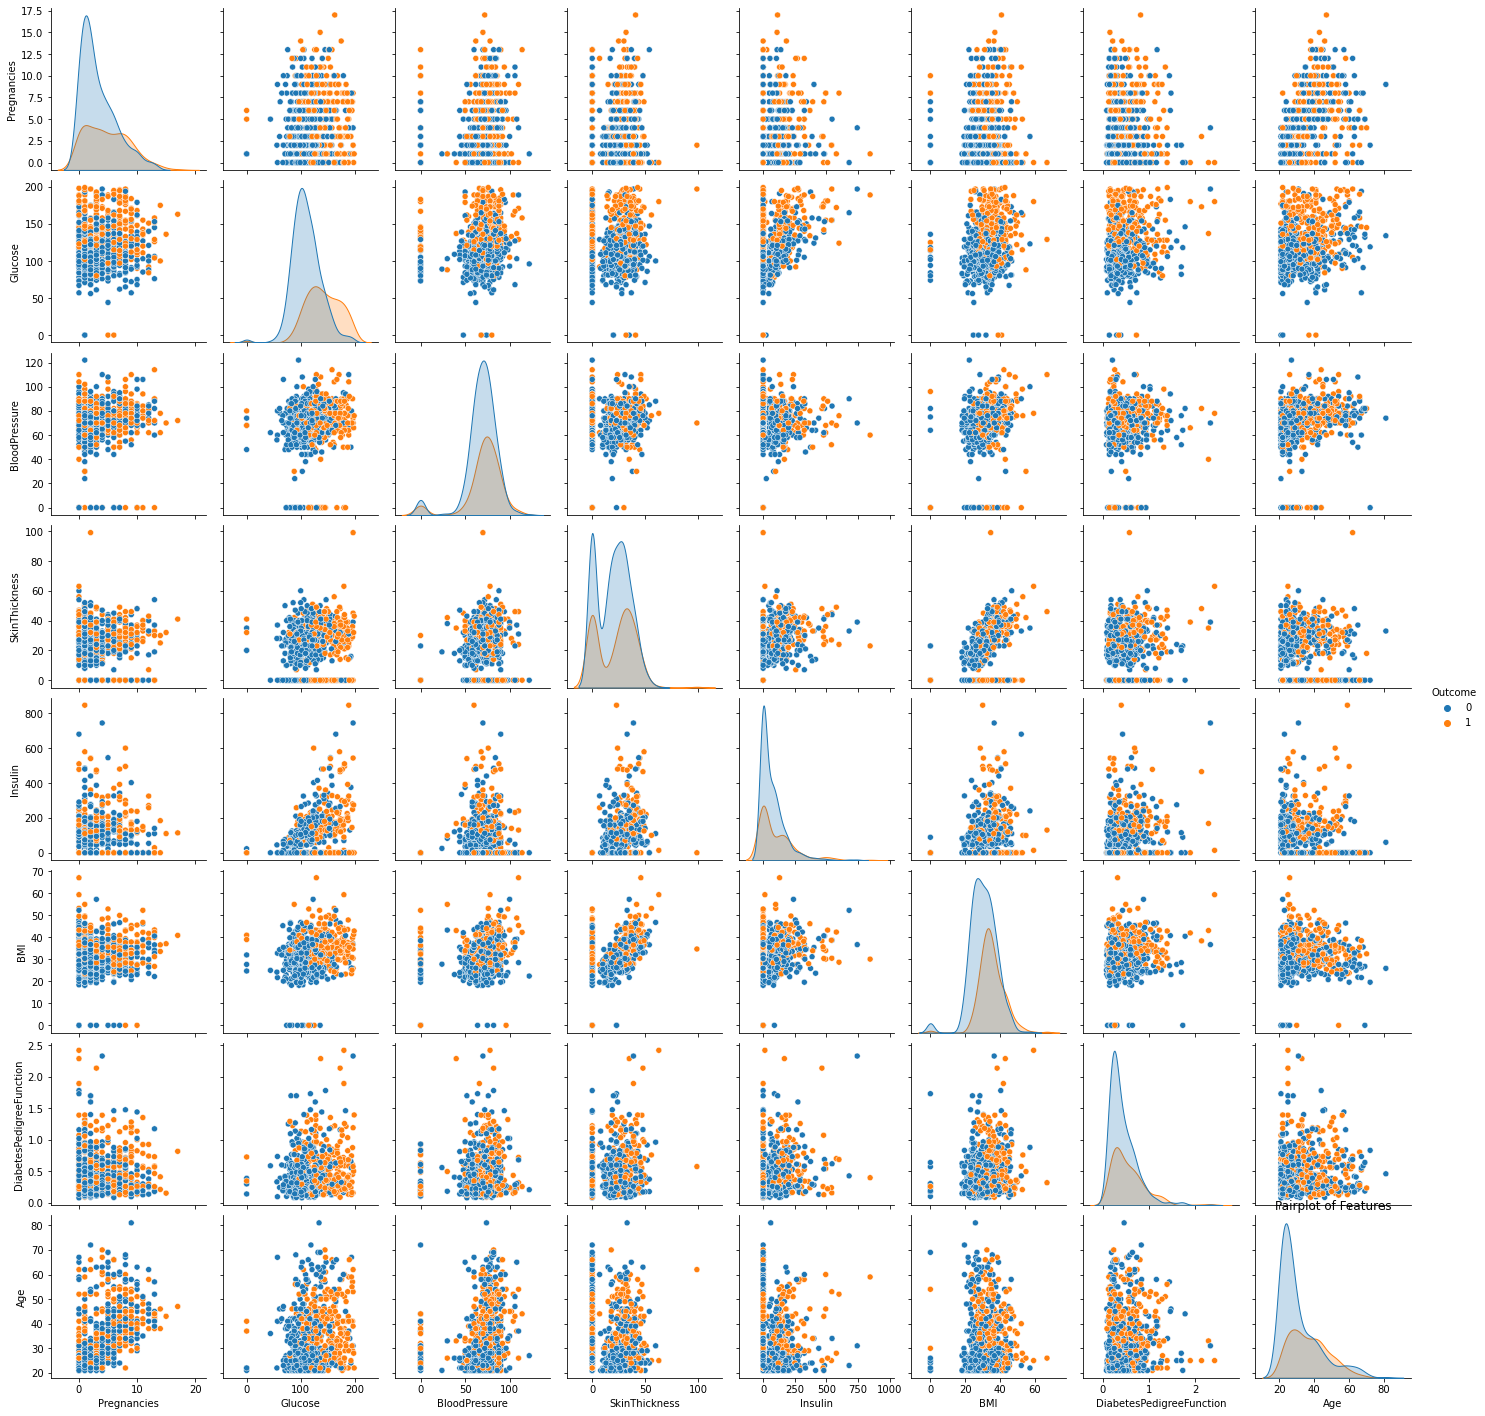

In [7]:
sns.pairplot(data=df, hue='Outcome')
plt.title("Pairplot of Features")
plt.show()

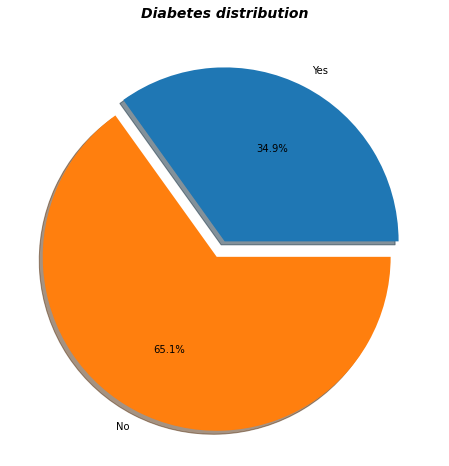

In [8]:
plt.figure(figsize=(12,8))
plt.pie(df['Outcome'].value_counts(sort=False), autopct='%1.1f%%', explode=[0, 0.1], shadow=True, labels=['Yes', 'No'])
plt.title('Diabetes distribution', weight='bold', style='italic', fontsize=14);

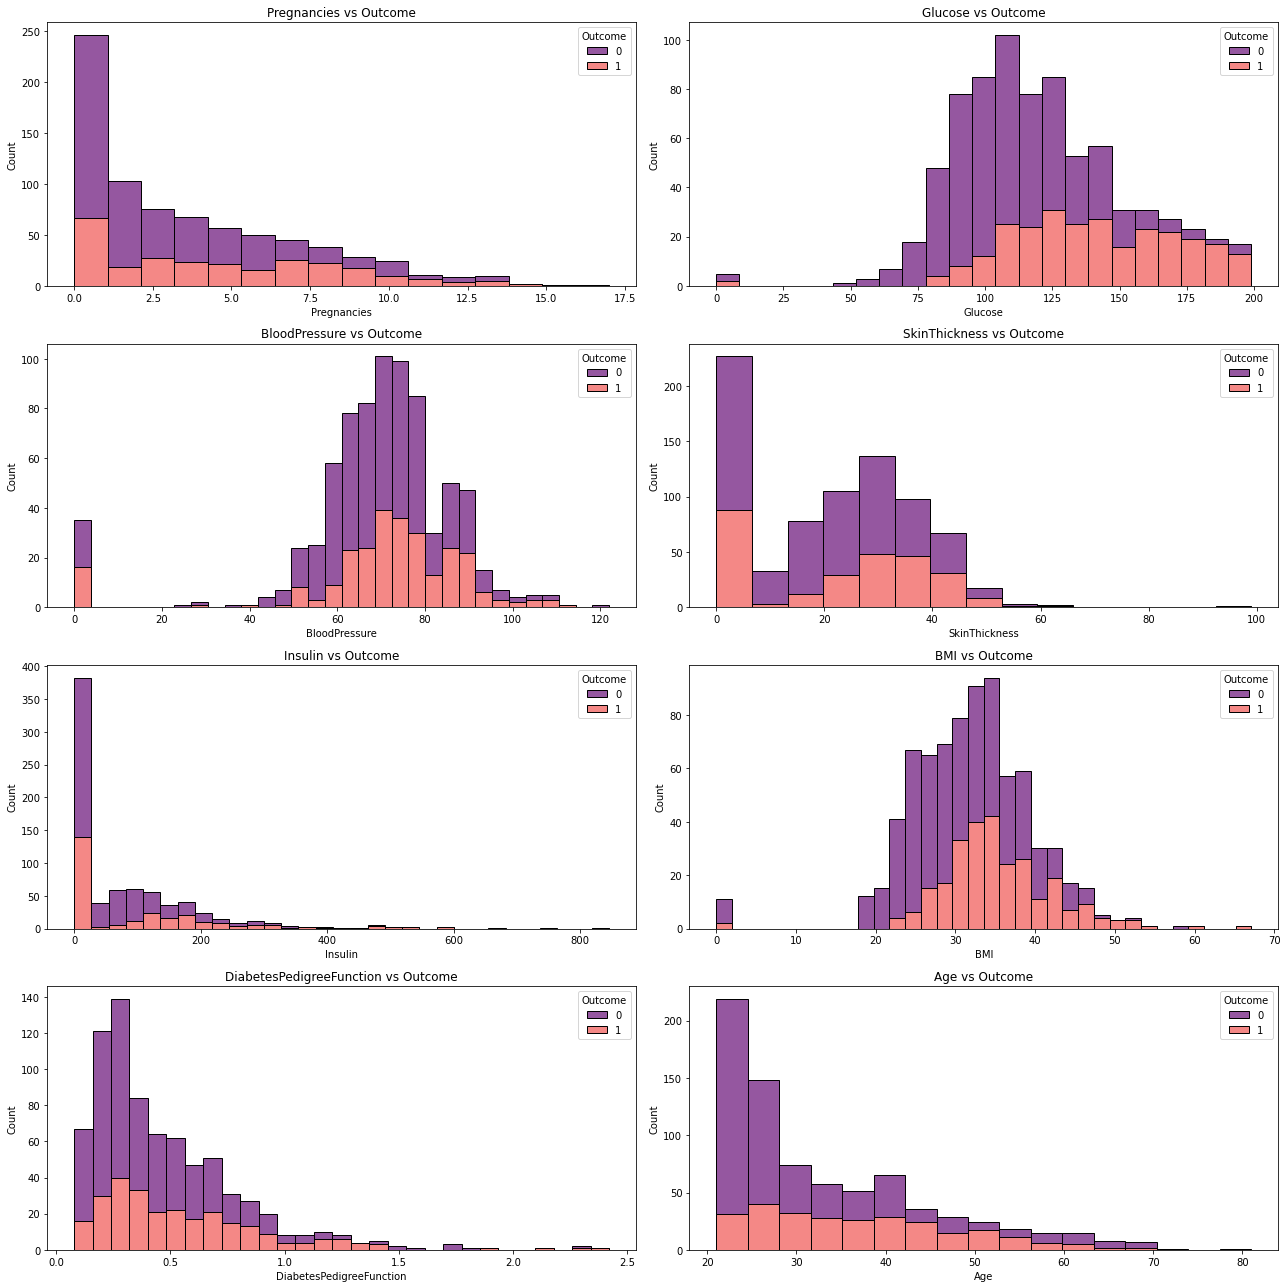

In [9]:
plt.figure(figsize=(18, 18))

# Plot Pregnancies vs. Outcome
plt.subplot(4, 2, 1)
sns.histplot(data=df, x='Pregnancies', hue="Outcome", multiple="stack", palette='magma')
plt.title('Pregnancies vs Outcome')

# Plot Glucose vs. Outcome
plt.subplot(4, 2, 2)
sns.histplot(data=df, x='Glucose', hue="Outcome", multiple="stack", palette='magma')
plt.title('Glucose vs Outcome')

# Plot BloodPressure vs. Outcome
plt.subplot(4, 2, 3)
sns.histplot(data=df, x='BloodPressure', hue="Outcome", multiple="stack", palette='magma')
plt.title('BloodPressure vs Outcome')

# Plot SkinThickness vs. Outcome
plt.subplot(4, 2, 4)
sns.histplot(data=df, x='SkinThickness', hue="Outcome", multiple="stack", palette='magma')
plt.title('SkinThickness vs Outcome')

# Plot Insulin vs. Outcome
plt.subplot(4, 2, 5)
sns.histplot(data=df, x='Insulin', hue="Outcome", multiple="stack", palette='magma')
plt.title('Insulin vs Outcome')

# Plot BMI vs. Outcome
plt.subplot(4, 2, 6)
sns.histplot(data=df, x='BMI', hue="Outcome", multiple="stack", palette='magma')
plt.title('BMI vs Outcome')

# Plot DiabetesPedigreeFunction vs. Outcome
plt.subplot(4, 2, 7)
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue="Outcome", multiple="stack", palette='magma')
plt.title('DiabetesPedigreeFunction vs Outcome')

# Plot Age vs. Outcome
plt.subplot(4, 2, 8)
sns.histplot(data=df, x='Age', hue="Outcome", multiple="stack", palette='magma')
plt.title('Age vs Outcome')

plt.tight_layout()

plt.show()

<a id='2'></a><br>
# Detect Outliers

In [10]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [11]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [12]:
len(outlier_index)

21

In [13]:
df.drop(outlier_index, inplace=True)

<a id='4'></a><br>
# Dealing with Imbalanced Data

### Undersampling: 

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [15]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [16]:
# before Undersample

pd.Series(y).value_counts()

Outcome
0    487
1    260
Name: count, dtype: int64

In [17]:
undersampler = RandomUnderSampler(random_state=42)

In [18]:
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [19]:
# after Undersample

pd.Series(y_undersampled).value_counts()

Outcome
0    260
1    260
Name: count, dtype: int64

#### Get back the original data if it was changed by Undersampling

In [20]:
df = pd.DataFrame(data)

### Oversampling (SMOTE):

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [23]:
# before SMOTE

pd.Series(y).value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [24]:
smote = SMOTE(random_state=42)

In [25]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [26]:
# after SMOTE

pd.Series(y_resampled).value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

We choose the SMOTE method because of less dataset size, we try to preserve maximum data

<a id='5'></a><br>
# Data Scaling

In [27]:
from sklearn import preprocessing
x_scaled= preprocessing.StandardScaler().fit(X_resampled).transform(X_resampled)
x_scaled[0:5]

array([[ 0.63294236,  0.70459938,  0.14812026,  0.87576327, -0.71924071,
         0.12159194,  0.38498862,  1.41593023],
       [-0.88563336, -1.26050581, -0.15488743,  0.50243612, -0.71924071,
        -0.8112318 , -0.43879908, -0.26234016],
       [ 1.24037265,  1.79632449, -0.25589   , -1.30197843, -0.71924071,
        -1.25099156,  0.51930183, -0.17401014],
       [-0.88563336, -1.13573723, -0.15488743,  0.12910897,  0.07904752,
        -0.611341  , -0.98799088, -1.14564037],
       [-1.18934851,  0.36148578, -1.46792077,  0.87576327,  0.70748719,
         1.38756701,  5.34263851, -0.08568012]])

<a id='7'></a><br>
# Train / Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_test.shape,  y_test.shape)

Train set: (800, 8) (800,)
Validation set: (200, 8) (200,)


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [30]:
logistic_regression = LogisticRegression(random_state=42)

In [31]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
y_pred_logistic = logistic_regression.predict(X_test)

In [33]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep = classification_report(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

print("Logistic Regression Model")
print(f"Accuracy: {accuracy_logistic:.4f}")

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Logistic Regression Model
Accuracy: 0.7550

Confusion Matrix:
 [[73 26]
 [23 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        99
           1       0.75      0.77      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [35]:
rf_classifier = RandomForestClassifier(random_state=42)

In [36]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred_random = rf_classifier.predict(X_test)

In [38]:
accuracy_random = accuracy_score(y_test, y_pred_random)
classification_rep = classification_report(y_test, y_pred_random)
conf_matrix = confusion_matrix(y_test, y_pred_random)
precision = precision_score(y_test, y_pred_random)
recall = recall_score(y_test, y_pred_random)
f1 = f1_score(y_test, y_pred_random)

print("Random Forest Model")
print(f"Accuracy: {accuracy_random:.4f}")
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)


print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Random Forest Model
Accuracy: 0.8200
Precision Score: 0.7876106194690266
Recall Score: 0.8811881188118812
F1 Score: 0.8317757009345794

Confusion Matrix:
 [[75 24]
 [12 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        99
           1       0.79      0.88      0.83       101

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



# Support Vector Machines

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [40]:
svm_classifier = SVC(random_state=42)

In [41]:
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [42]:
y_pred_svm = svm_classifier.predict(X_test)

In [43]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
confusion = confusion_matrix(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)

print("Support Vector Machines")
print("Accuracy:", accuracy_svm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Support Vector Machines
Accuracy: 0.755
Precision: 0.7321428571428571
Recall: 0.8118811881188119
F1 Score: 0.7699530516431925

Confusion Matrix:
 [[69 30]
 [19 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        99
           1       0.73      0.81      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



# k-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [45]:
k = 5  #Adjust k here
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [46]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred_knn = knn_classifier.predict(X_test)

In [48]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("Random Forest Model")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Random Forest Model
Accuracy: 0.7700
Precision Score: 0.7310924369747899
Recall Score: 0.8613861386138614
F1 Score: 0.7909090909090909

Confusion Matrix:
 [[69 30]
 [19 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.74        99
           1       0.73      0.86      0.79       101

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



# Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [50]:
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

In [51]:
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [52]:
y_pred_gradient = gradient_boosting_model.predict(X_test)

In [53]:
accuracy_gradient = accuracy_score(y_test, y_pred_gradient)
classification_rep = classification_report(y_test, y_pred_gradient)
conf_matrix = confusion_matrix(y_test, y_pred_gradient)
precision = precision_score(y_test, y_pred_gradient)
recall = recall_score(y_test, y_pred_gradient)
f1 = f1_score(y_test, y_pred_gradient)

print("Random Forest Model")
print(f"Accuracy: {accuracy_gradient:.4f}")
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Random Forest Model
Accuracy: 0.7900
Precision Score: 0.7706422018348624
Recall Score: 0.8316831683168316
F1 Score: 0.7999999999999999

Confusion Matrix:
 [[74 25]
 [17 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.77      0.83      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



# Accuracy Comparision Models

In [54]:
sns.set(context='notebook', style=None, palette='tab10')

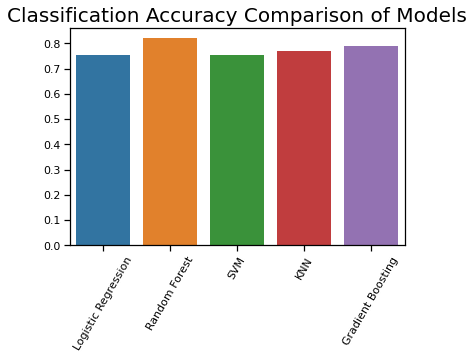

In [55]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting']
scores = [accuracy_logistic, accuracy_random, accuracy_svm, accuracy_knn, accuracy_gradient]
ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(60)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

**Here the Random Forest gives highest accuracy. So, we used this model for prediction for real time data.**

# **Prediction  of the Model**

## **Prediction_1**

In [56]:
input_data = (3, 90, 60, 40, 0.34, 40.9, 0.201, 0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = rf_classifier.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
   print('The Person has Diabetes')
else:
   print('The Person does not have Diabetes')


[1]
The Person has Diabetes


# Find out a case for "NO diabetes"

## **Prediction_2**

In [ ]:
input_data = (48,	0,	1,	138,	214,	0,	2,	108,	1,	1.5,	2	)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction2 = r_forest.predict(input_data_reshaped)
print(prediction2)

if (prediction2== 1):
   print('The Person has Heart Disease')
else:
   print('The Person does not have a Heart Disease')


[1]
The Person has Heart Disease
